In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [7]:
df = pd.read_csv("modeling/league_avg_fg3a_fga_predictions.csv")


In [8]:
def weighted_mse(true, pred, weights):
    return (weights * (true - pred) ** 2).sum() / weights.sum()
weighted_mse(df.league_avg_fg3a_fga, df.league_avg_fg3a_fga.mean(), df_cnn.fga)

0.001372641630738644

In [9]:
df.league_avg_fg3a_fga.mean()

0.3306146940863683

In [12]:
x = np.array(df.league_avg_fg3a_fga.tolist())

In [12]:
print(mean_squared_error(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga))
print(r2_score(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga))
print(weighted_mse(df.league_avg_fg3a_fga, df.predicted_league_avg_fg3a_fga, df_lstm.fga))

0.0009625766473421483
0.4593597363423908
0.0006291562388663707


In [3]:
import numpy as np


0.0011774107653244046
0.33742774853083335
[[1.         0.60496675]
 [0.60496675 1.        ]]


0.0007346204565743974

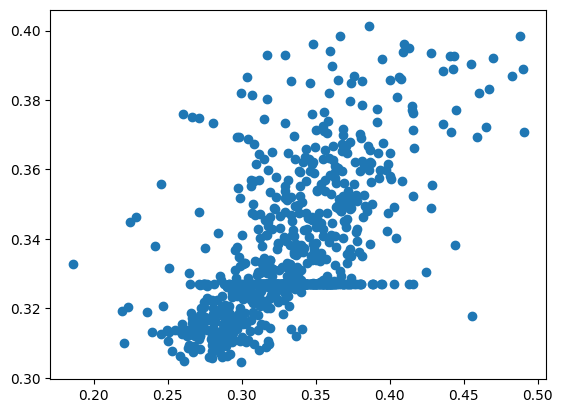

In [11]:
df_lstm = pd.read_csv("modeling/lstm/lstm_test_predictions.csv")
plt.scatter(df_lstm.league_avg_fg3a_fga[4:], df_lstm.Predictions[:-4])
print(mean_squared_error(np.array(df_lstm.league_avg_fg3a_fga.iloc[4:]), np.array(df_lstm.Predictions[:-4])))
print(r2_score(df_lstm.league_avg_fg3a_fga.iloc[4:], df_lstm.Predictions[:-4]))
print(np.corrcoef(df_lstm.league_avg_fg3a_fga.iloc[4:], df_lstm.Predictions[:-4]))
weighted_mse(df_lstm.league_avg_fg3a_fga.iloc[4:],df_lstm.Predictions[:-4], df_lstm.fga.iloc[4:])

0.0010691840969312863
0.39833086701597653
[[1.         0.67678832]
 [0.67678832 1.        ]]


0.0006034068606937306

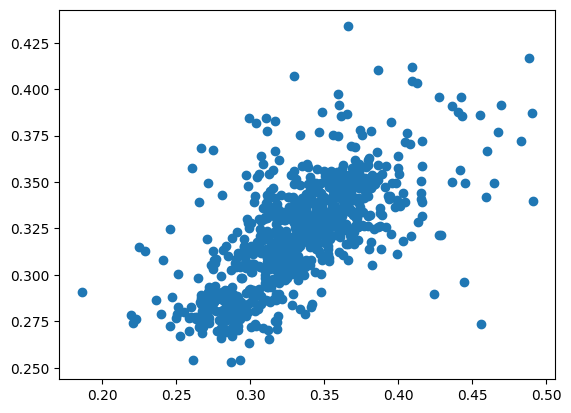

In [35]:
df_keras = pd.read_csv("modeling/causal_cnn/keras_cnn_preds.csv")
plt.scatter(df_keras.true, df_keras.preds)
print(mean_squared_error(df_keras.true, df_keras.preds))
print(r2_score(y_true=df_keras.true, y_pred=df_keras.preds))
print(np.corrcoef(df_keras.true, df_keras.preds))
weighted_mse(df_keras.true, df_keras.preds, df_keras.weights)

In [37]:
df.columns

Index(['game_date', 'predicted_league_avg_fg3a_fga', 'league_avg_fg3a_fga'], dtype='object')

0.0012271944240923784
0.30941265656148065
[[1.        0.6557015]
 [0.6557015 1.       ]]
0.000449374091007161


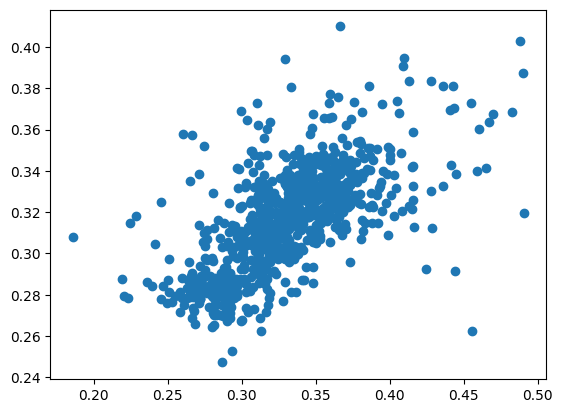

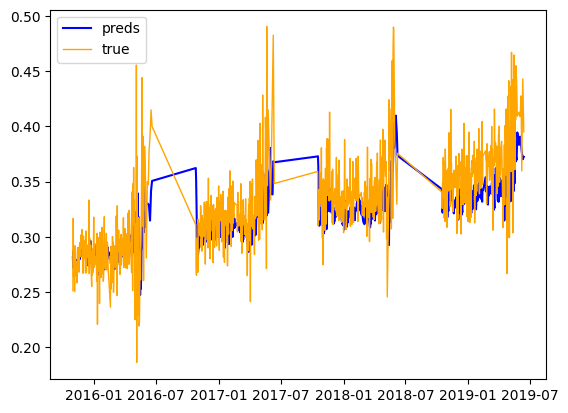

In [39]:
df_cnn = pd.read_csv("modeling/causal_cnn/cnn_test_predictions.csv")
plt.scatter(df_cnn.league_avg_fg3a_fga[4:], df_cnn.Predictions[:-4])
print(mean_squared_error(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(r2_score(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(np.corrcoef(df_cnn.league_avg_fg3a_fga.iloc[4:], df_cnn.Predictions[:-4]))
print(weighted_mse(df_cnn.league_avg_fg3a_fga.iloc[4:],
             df_cnn.Predictions[:-4],
              df_cnn.fga.iloc[4:]
            ))
plt.show()
plt.plot(pd.to_datetime(df.game_date.iloc[3:]), df_cnn.Predictions.iloc[:-4], color="blue", label="preds")
plt.plot(pd.to_datetime(df.game_date.iloc[3:]), df.league_avg_fg3a_fga.iloc[3:], color='orange', label="true", linewidth=1)
plt.legend()
plt.show()

In [56]:
preds = df_cnn.Predictions.iloc[:-4].reset_index(drop=True)
dates = pd.to_datetime(df.game_date.iloc[3:].reset_index(drop=True))
true = df_cnn.league_avg_fg3a_fga.iloc[4:].reset_index(drop=True)
weights = df_cnn.fga.iloc[4:].reset_index(drop=True)

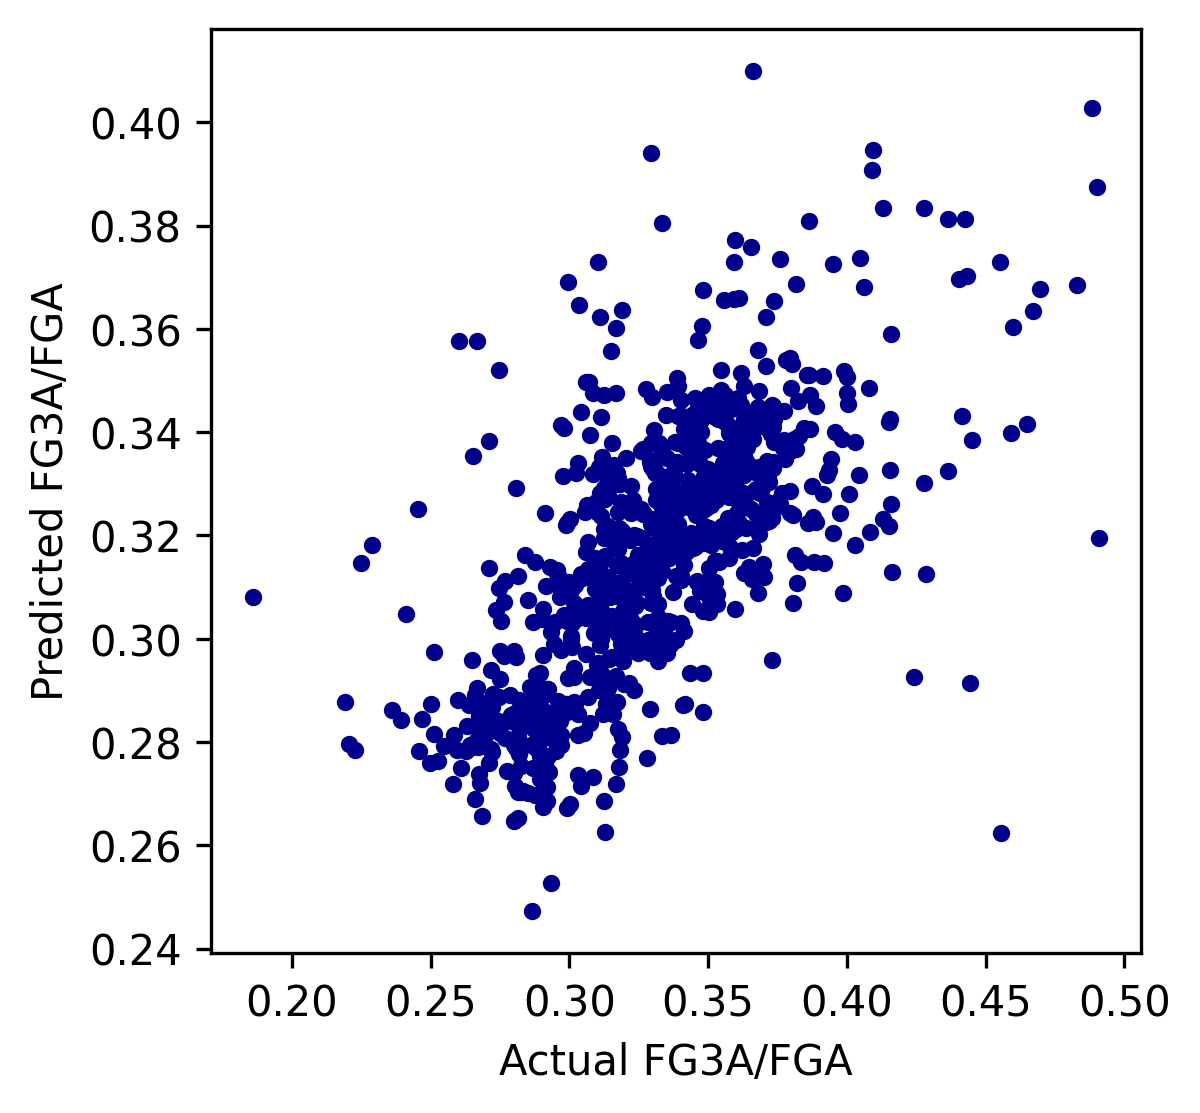

In [81]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(true, preds, s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("preds-actual.png", dpi=300, bbox_inches="tight")
plt.show()

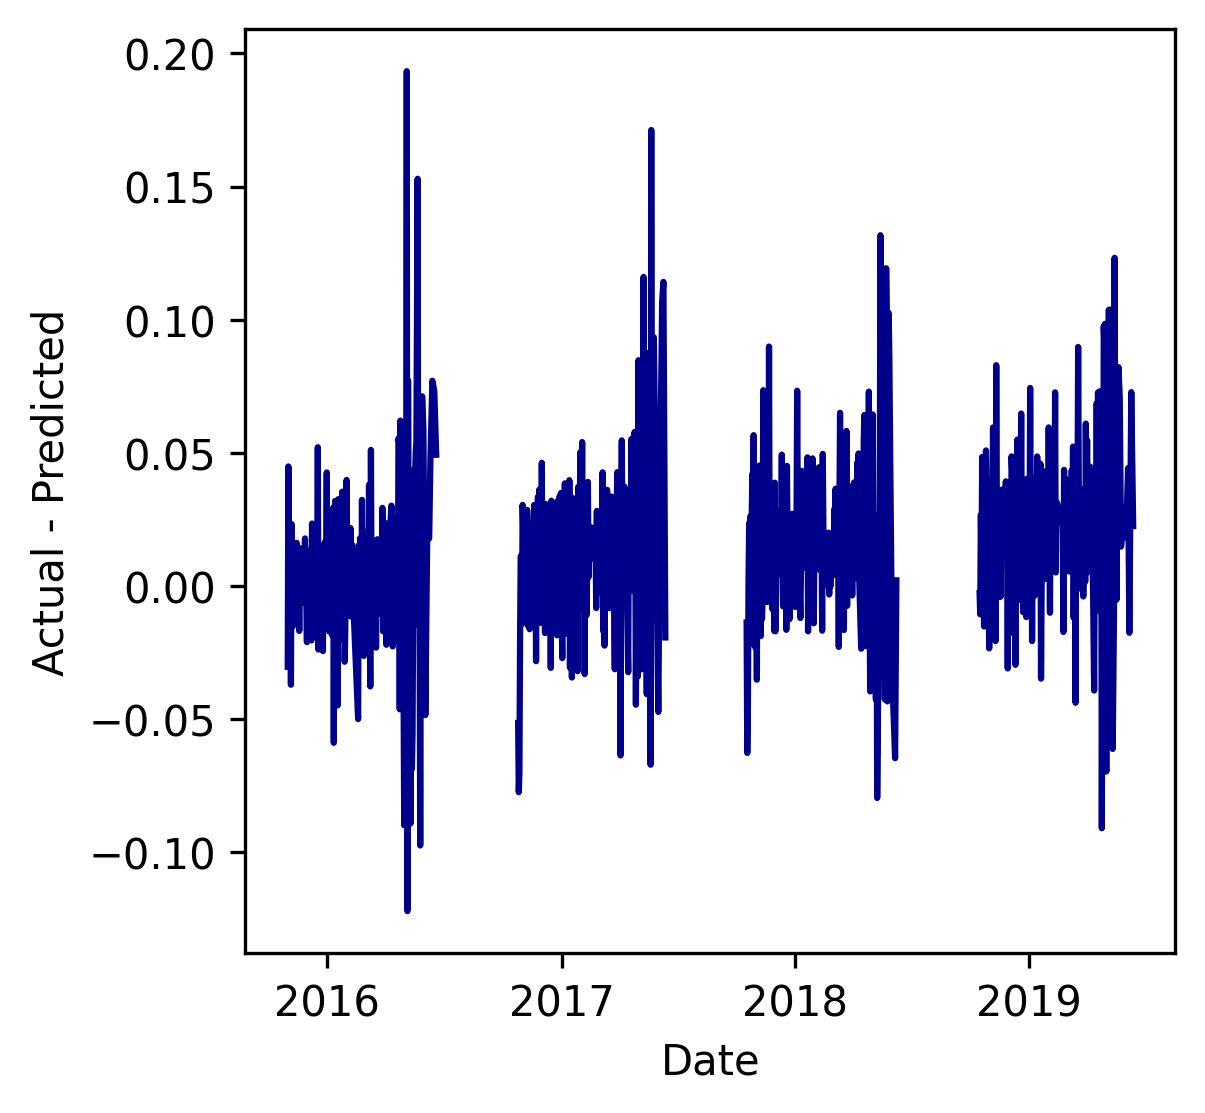

In [83]:
plt.figure(figsize=(4, 4), dpi=300)
plt.plot(dates[dates < "2016-08-01"], (true - preds)[dates < "2016-08-01"], color="darkblue")
plt.plot(
    dates[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    (true - preds)[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    color="darkblue"
)
plt.plot(
    dates[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    (true - preds)[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    color="darkblue"
)
plt.plot(dates[dates >= "2018-08-01"], (true - preds)[dates >= "2018-08-01"], color="darkblue")
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"], [*range(2016, 2020)])
plt.xlabel("Date")
plt.ylabel("Actual - Predicted")
plt.savefig("residuals.png", dpi=300, bbox_inches="tight")
plt.show()

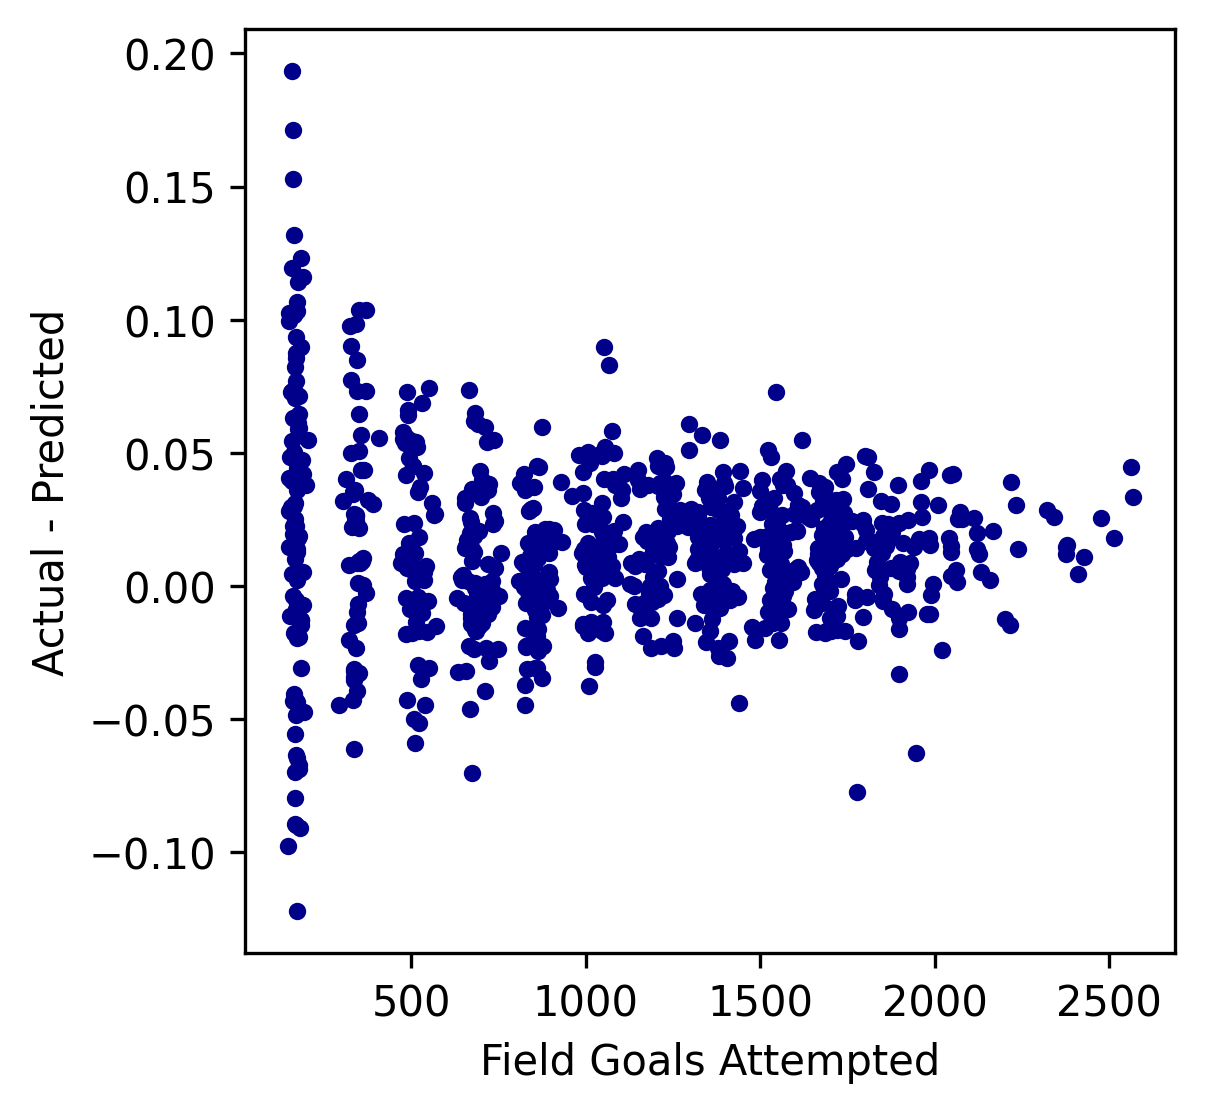

In [82]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(weights, true - preds, s = 10, color="darkblue")
plt.xlabel("Field Goals Attempted")
plt.ylabel("Actual - Predicted")
plt.savefig("residuals-weights.png", dpi=300, bbox_inches="tight")

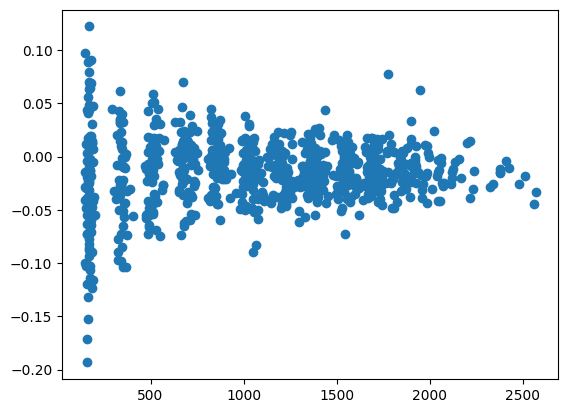

In [59]:
plt.scatter(df_cnn.fga.iloc[4:].reset_index(drop=True), df_cnn.Predictions[:-4].reset_index(drop=True) - df_cnn.league_avg_fg3a_fga.iloc[4:].reset_index(drop=True))

In [66]:
((df.league_avg_fg3a_fga - df.predicted_league_avg_fg3a_fga) ** 2 * df_cnn.fga / df_cnn.fga.sum()).sum()

0.0006691034312729719

In [61]:
df_bl

,game_date,predicted_Brook Lopez_fg3a_fga_delta,predicted_league_avg_fg3a_fga,league_avg_fg3a_fga,fg3a_fga,predicted_player_fg3a_fga,Brook Lopez_fg3a_fga
0,2017-10-20,-0.056591,0.322675,0.321779,0.500000,0.266083,0.500000
1,2017-10-22,0.035836,0.314885,0.315299,0.375000,0.350721,0.375000
2,2017-10-25,0.033200,0.322354,0.346987,0.250000,0.355554,0.250000
3,2017-10-27,-0.029732,0.332568,0.336842,0.214286,0.302836,0.214286
4,2017-10-28,-0.038595,0.336624,0.380631,0.285714,0.298028,0.285714
...,...,...,...,...,...,...,...
164,2019-05-17,0.287982,0.392070,0.407821,0.571429,0.680052,0.571429
165,2019-05-19,0.218737,0.400916,0.436275,0.700000,0.619653,0.700000
166,2019-05-21,0.326710,0.398791,0.455090,0.600000,0.725501,0.600000
167,2019-05-23,0.195470,0.405336,0.440476,0.333333,0.600806,0.333333


In [60]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga'])

0.03858205382124047


0.09768816979738815

In [84]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions_CNN.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga']))
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], df_bl.field_goals_attempted))

0.03863449109618111
0.0964618283034453
0.035783703435920425


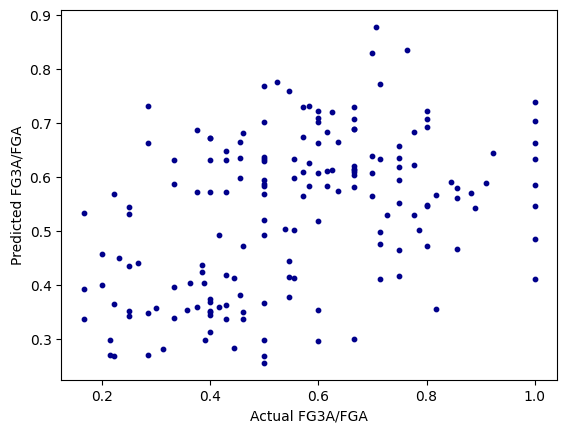

In [89]:
plt.scatter(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("bl-pred-actual.png", dpi=300, bbox_inches="tight")
plt.show()

In [91]:
np.corrcoef(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'])

array([[1.        , 0.42393001],
       [0.42393001, 1.        ]])

In [92]:
np.corrcoef(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'])

array([[1.        , 0.24120603],
       [0.24120603, 1.        ]])

In [86]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_CNN.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.006920900640702241
0.05718584790370318
0.006211971295548302


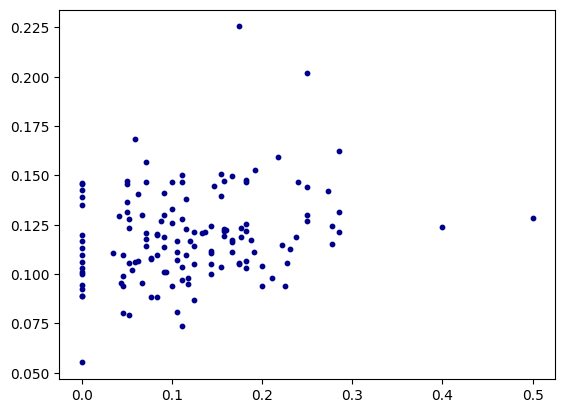

In [87]:
plt.scatter(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], s=10, color="darkblue")

In [18]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions.csv")
print(mean_squared_error(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_bl['fg3a_fga'], y_pred=df_bl['predicted_player_fg3a_fga']))
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'], df_bl.field_goals_attempted))

0.038556145027120854
0.09829409429142177
0.03587847456423455


In [73]:
print(weighted_mse(df_bl['fg3a_fga'], df_bl['predicted_player_fg3a_fga'].mean(), df_bl.field_goals_attempted))

0.04175869396172811


In [20]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_Prophet.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.006936955153727832
0.05499878831834748
0.006210955868170005


In [17]:
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions.csv")
print(mean_squared_error(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga']))
print(r2_score(y_true=df_ad['fg3a_fga'], y_pred=df_ad['predicted_player_fg3a_fga']))
print(weighted_mse(df_ad['fg3a_fga'], df_ad['predicted_player_fg3a_fga'], df_ad.field_goals_attempted))

0.007024846269146612
0.043025637458036003
0.0062887239950952965


In [91]:
print(weighted_mse(df_ad['fg3a_fga'], df_ad['fg3a_fga'].mean(), df_ad.field_goals_attempted))

0.006518105668644251
